<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the
>
>● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.                                                                                                            
● ‘Neighborhood’ indicates the
location of the hospital.                                                                                                  
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.  
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

What factors are
important for us to
know in order to
predict if a patient will
show up for their
scheduled
appointment?

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbr
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties

In [55]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [56]:
#number of patients and their characterstics
df.shape

(110527, 14)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no missing data

In [58]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [59]:
#there are no duplicates
sum(df.duplicated())

0

the mean of ages is 37                                                             
maximum age is 115                                                                                         
min is -1 it doesn't make any sense and couldn't be true

In [60]:
#fixing minimum age
age_error_index=df.query('Age<0').index
df.drop(labels=age_error_index,axis=0,inplace=True)

In [61]:
#check..
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimun ages Fixed ..

In [62]:
#make columns lowercase
df.columns=df.columns.str.lower()
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning (Replace this with more specific notes!)

In [63]:
# drop columns which i wouldn't need in my investigating
df.drop(['patientid','appointmentid','scheduledday','appointmentday'],axis=1,inplace=True)
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [64]:
#rename "no-show" to "no_show"
df.rename(columns={'no-show':'no_show'},inplace=True)

In [65]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### General look using histograms

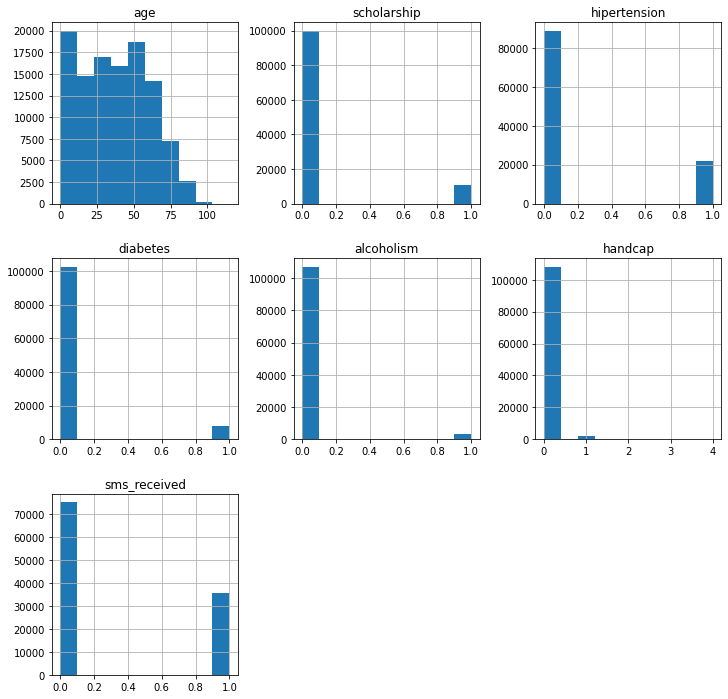

In [66]:
df.hist(figsize=(12,12));

-almost 10000 patients only have scholarships                                                                                
-more than 20000 patients have hipertension                                                                               
-less than 10000 patients have diabetes                                                                               
-less than 5000 patients have alcoholism                                                                               
-nearly 50% of patients have delivered the sms                                                                               


In [67]:
attend=df.no_show=='No'
noattend=df.no_show=='Yes'

In [68]:
df[attend].count()

gender           88207
age              88207
neighbourhood    88207
scholarship      88207
hipertension     88207
diabetes         88207
alcoholism       88207
handcap          88207
sms_received     88207
no_show          88207
dtype: int64

In [69]:
df[noattend].count()

gender           22319
age              22319
neighbourhood    22319
scholarship      22319
hipertension     22319
diabetes         22319
alcoholism       22319
handcap          22319
sms_received     22319
no_show          22319
dtype: int64

### Analyzing with each characterstics

In [70]:
#plot function
def plot_datas(columns_name):
    columns_name=columns_name
    plt.figure(figsize=[15,15])
    df[columns_name][attend].hist(label='attend')
    df[columns_name][noattend].hist(label='no attend')
    plt.legend()
    plt.title('Comparison between who attended to who didn\'t attend according to {}'.format(columns_name))
    plt.xlabel(columns_name)
    plt.ylabel('Patients number');

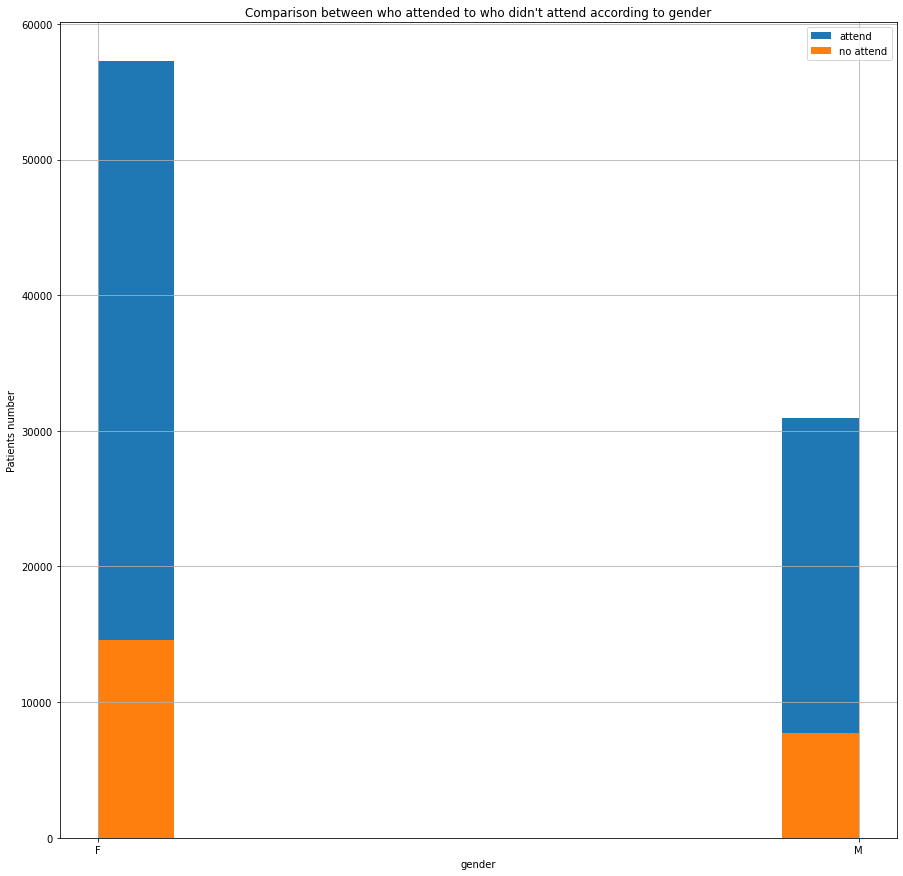

In [71]:
#make a Comparison between who attended to who didn't attend according to gender
plot_datas('gender')

In [72]:
#who attended
all_gender_count =df.gender[attend].count()

In [73]:
male_attend=df.gender[attend].value_counts().M
female_attend=df.gender[attend].value_counts().F

In [74]:
#get the perecentage
[(female_attend/all_gender_count)*100,(male_attend/all_gender_count)*100]

[64.89847744510074, 35.101522554899276]

In [75]:
#who not attended
df.gender[noattend].describe()

count     22319
unique        2
top           F
freq      14594
Name: gender, dtype: object

it seems that females intend to attend more than males

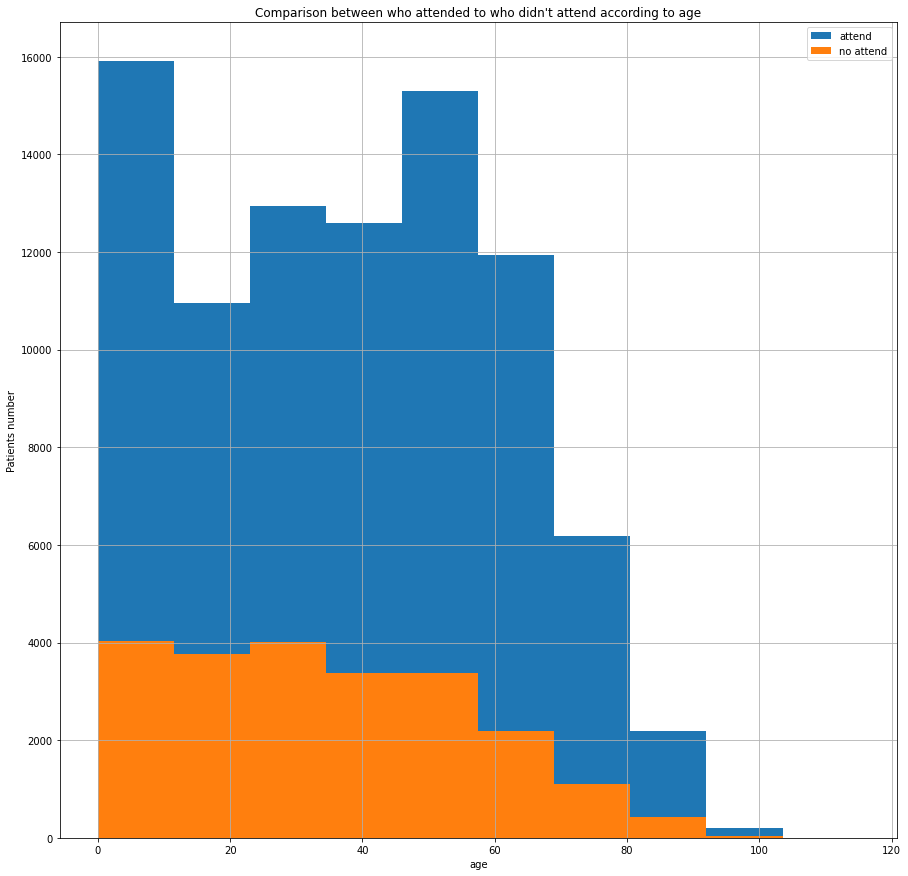

In [76]:
#make a Comparison between who attended to who didn't attend according to age
plot_datas('age')

In [25]:
df.groupby('age').no_show.value_counts()

age  no_show
0    No         2900
     Yes         639
1    No         1858
     Yes         415
2    No         1366
                ... 
99   No            1
100  No            4
102  No            2
115  Yes           3
     No            2
Name: no_show, Length: 203, dtype: int64

In [26]:
df.age.median()

37.0

In [27]:
df.age[attend].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: age, dtype: float64

In [28]:
df.age[noattend].describe()

count    22319.000000
mean        34.317667
std         21.965941
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: age, dtype: float64

we noticed that from 0 to 10 are the most who attended                                                              
and from almost 50 to older are right skewed ...                                                    
age may be significant however the mean age who attended is 37
and the mean age who not attended is 34 which meaning that who attended are older than who didn't

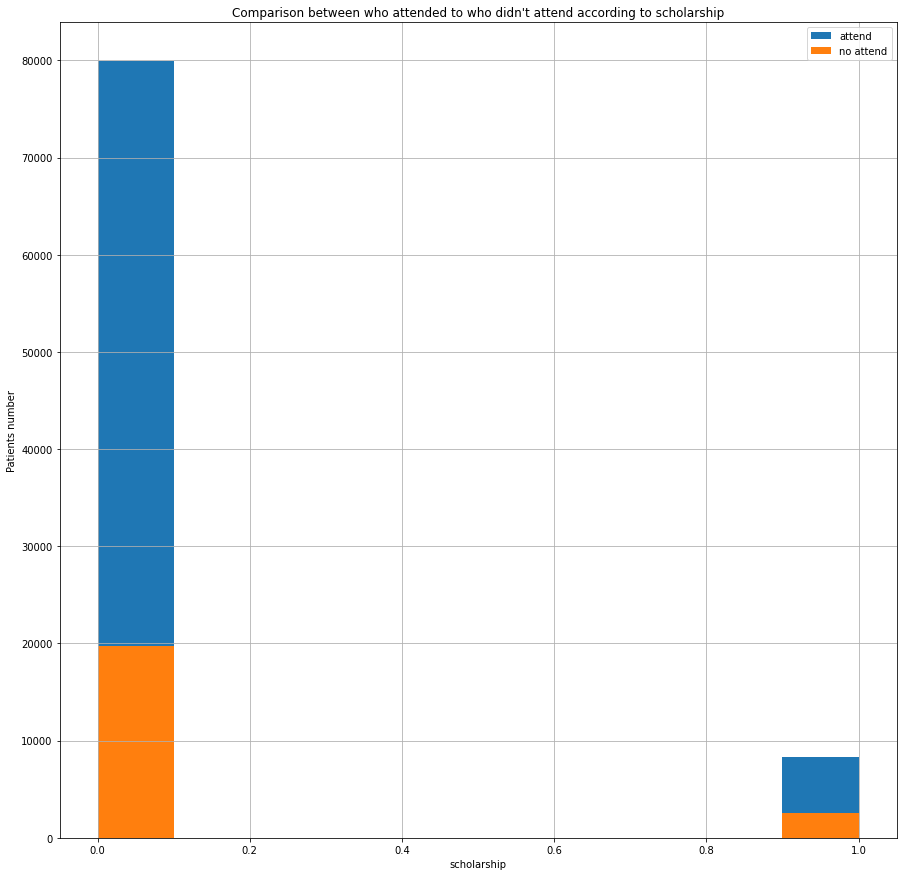

In [29]:
#make a Comparison between who attended to who didn't attend according to scholarship
plot_datas('scholarship')

                           
less than half of patient who have scholarships didn't attend

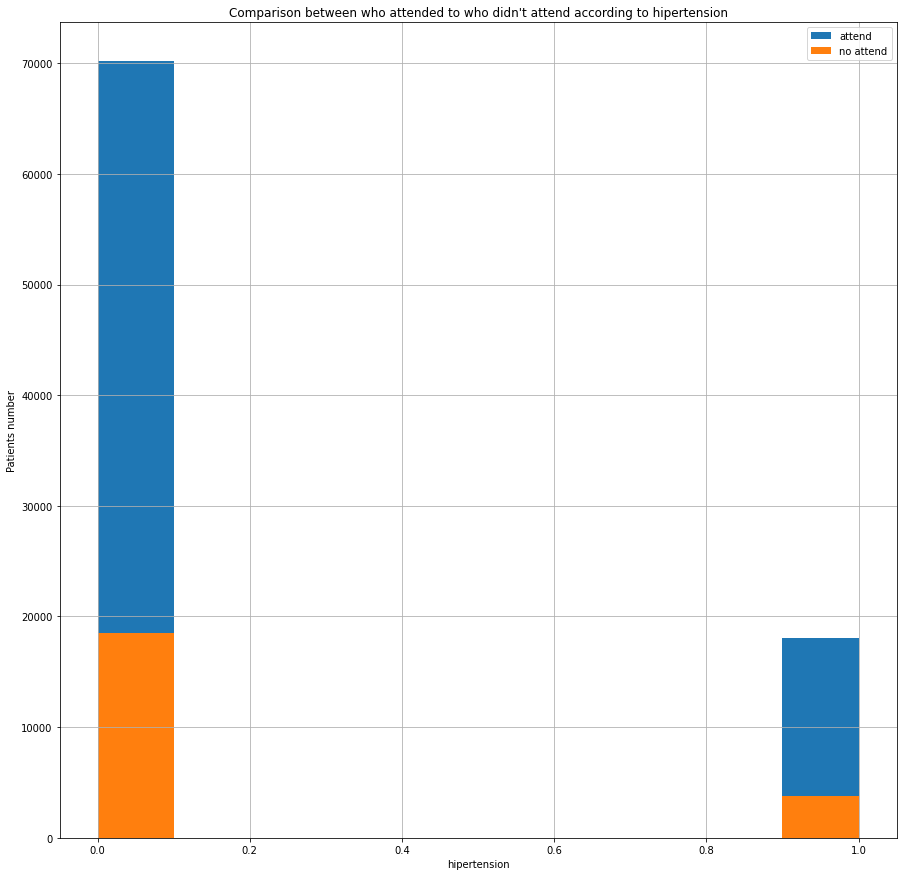

In [30]:
## make a Comparison between who attended to who didn't attend according to hipertension
plot_datas('hipertension')

In [31]:
df.hipertension[attend].describe()

count    88207.000000
mean         0.204394
std          0.403261
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: hipertension, dtype: float64

the patients who have hipertension attend more than who don't have hipertension

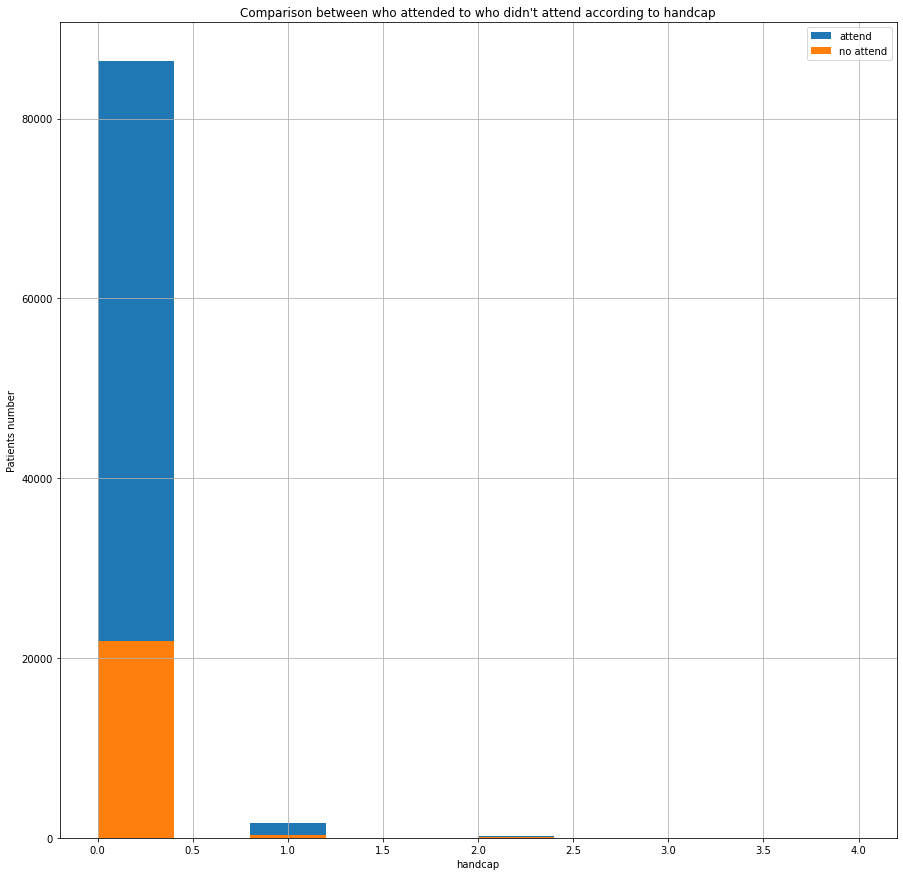

In [32]:
# make a Comparison between who attended to who didn't attend according to handcap
plot_datas('handcap')

In [33]:
handcap_attend=df.handcap[attend].value_counts()[1]+df.handcap[attend].value_counts()[2]+df.handcap[attend].value_counts()[3]+df.handcap[attend].value_counts()[4]
not_handcap_attend=df.handcap[attend].value_counts()[0]

In [34]:
#get the percentage
total_handcap=df.handcap.value_counts()[1]+df.handcap.value_counts()[2]+df.handcap.value_counts()[3]+df.handcap.value_counts()[4]
not_handcap=df.handcap.value_counts()[0]
[(not_handcap_attend/not_handcap)*100,(handcap_attend/total_handcap)*100]

[79.76451031998891, 81.83846497099509]

who have handcap disease attended are 82% intend to attend more who don't have


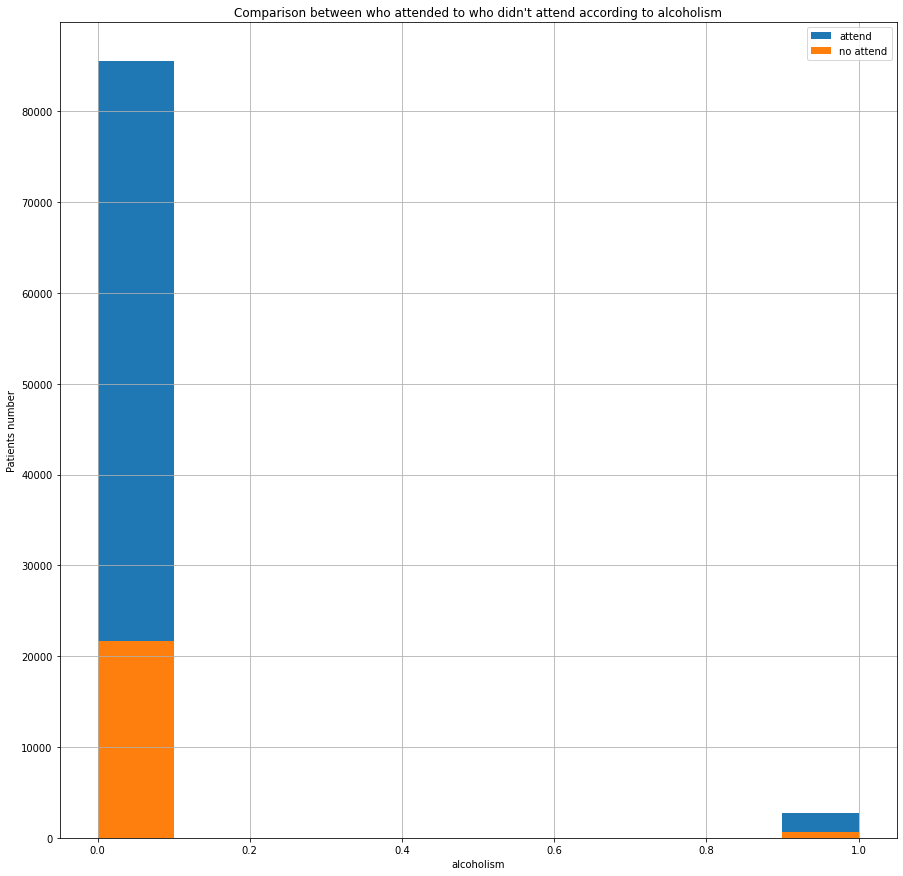

In [35]:
# make a Comparison between who attended to who didn't attend according to alcoholism
plot_datas('alcoholism')

In [36]:
alcoholism_attend=df.alcoholism[attend].value_counts()[1]
not_alcoholism_attend=df.alcoholism[attend].value_counts()[0]

In [37]:
#the percentage
total_alcoholism=df.alcoholism.value_counts()[1]
not_alcoholism=df.alcoholism.value_counts()[0]
[(not_alcoholism_attend/not_alcoholism)*100,(alcoholism_attend/total_alcoholism)*100]

[79.80516208498965, 79.85119047619048]

almost the same percentage between who have alcoholism and who don't have

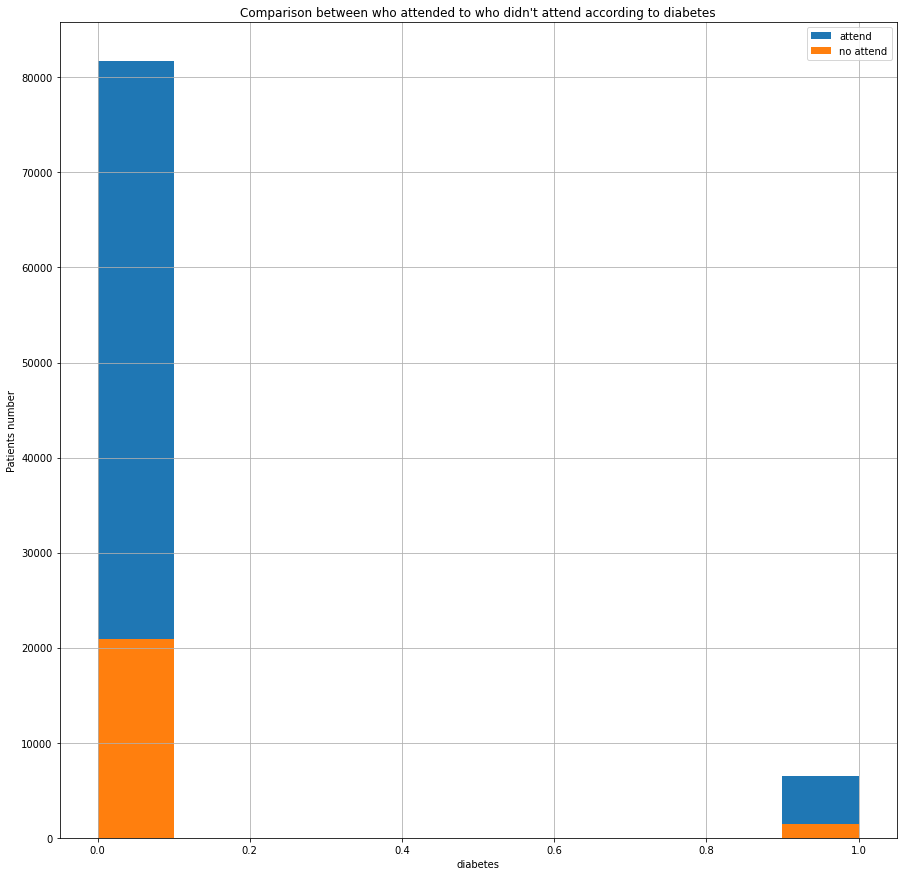

In [38]:
# make a Comparison between who attended to who didn't attend according to diabetes
plot_datas('diabetes')

In [39]:
#the percentage
diabetes_attend=df.diabetes[attend].value_counts()[1]
not_diabetes_attend=df.diabetes[attend].value_counts()[0]
total_diabetes=df.diabetes.value_counts()[1]
not_diabetes=df.diabetes.value_counts()[0]
[(not_diabetes_attend/not_diabetes)*100,(diabetes_attend/total_diabetes)*100]

[79.63697688700857, 81.99672667757774]

who have diabetes intend to attend (82%) more than who don't have (79%)


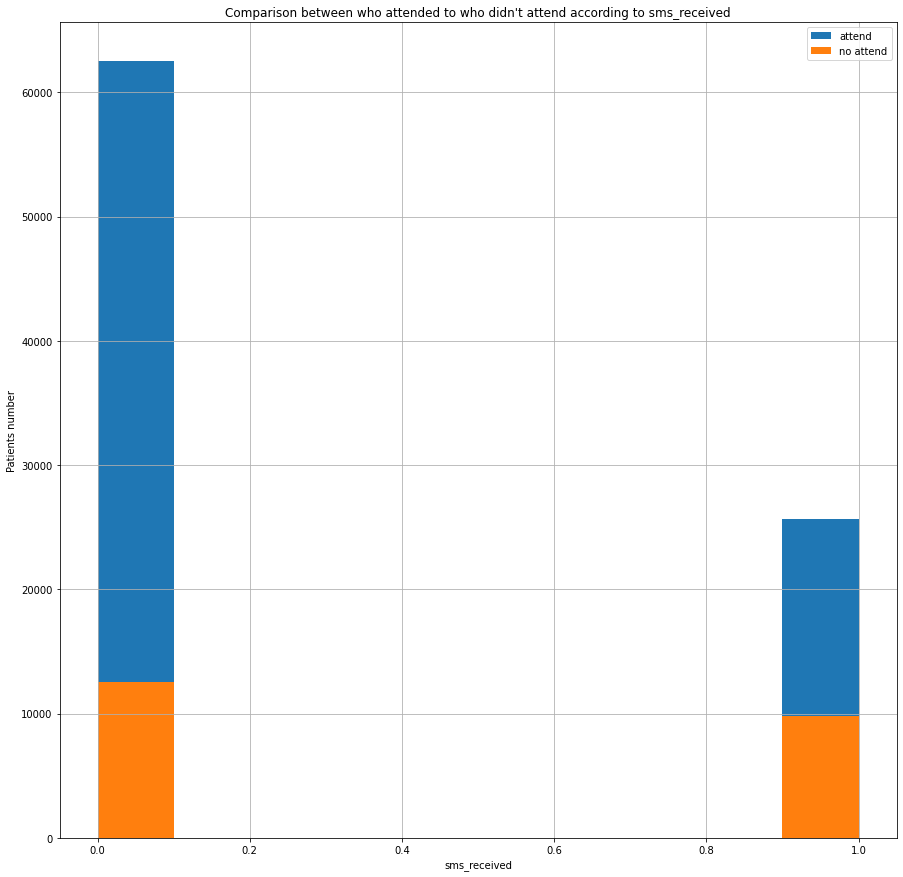

In [40]:
# make a Comparison between who attended to who didn't attend according to sms_received
plot_datas('sms_received')

In [41]:
received_attend=df.sms_received[attend].value_counts()[1]
notreceived_attend=df.sms_received[attend].value_counts()[0]

In [42]:
allreceived=df.sms_received.value_counts()[1]
allnotreceived=df.sms_received.value_counts()[0]
[(received_attend/allreceived)*100,(notreceived_attend/allnotreceived)*100]

[72.425455160363, 83.29646607323703]

who not recieved tha sms and attended is more than who recieved and attended

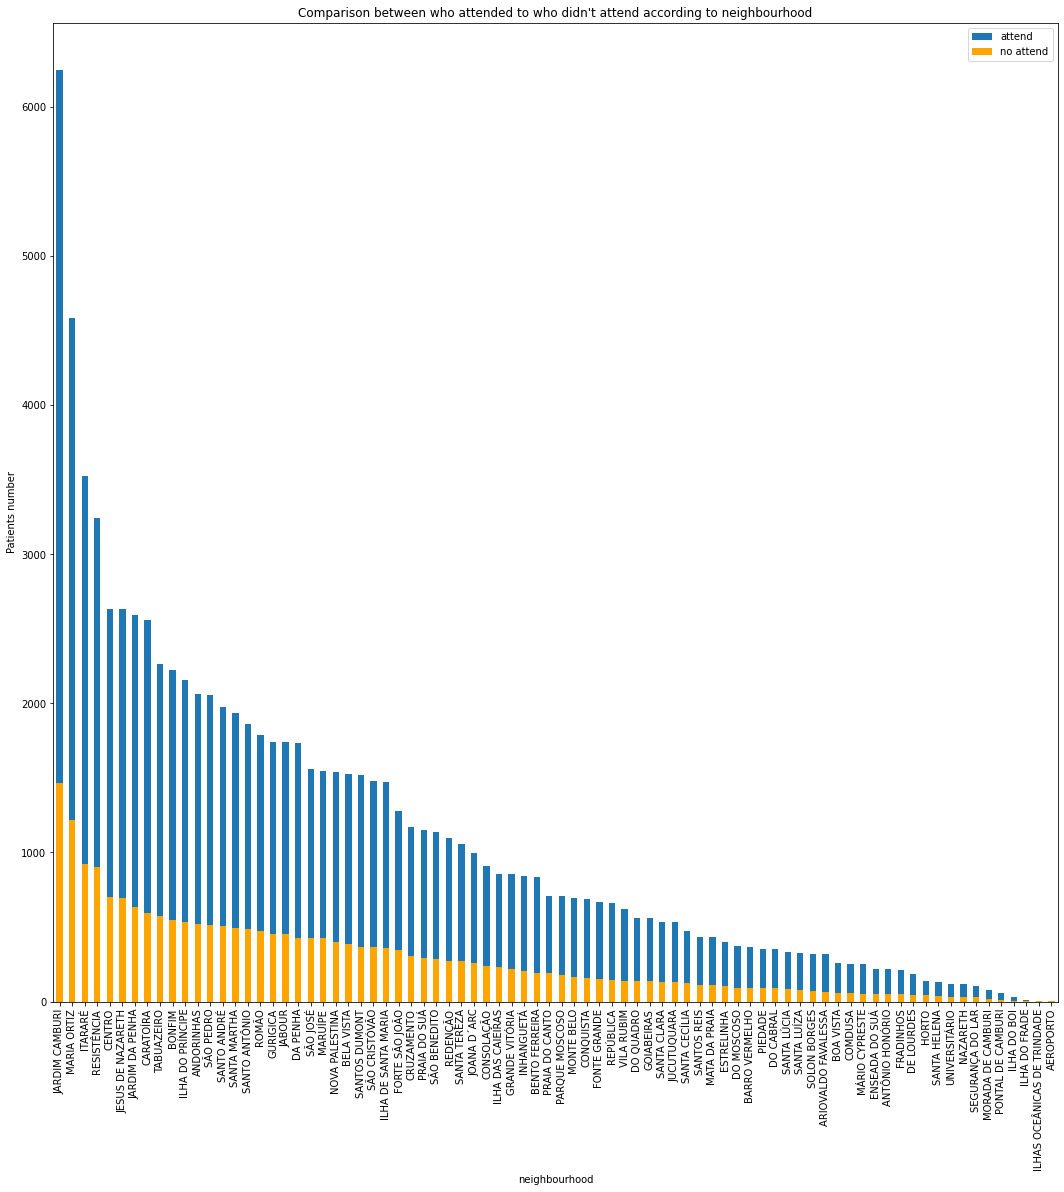

In [43]:
# make a Comparison between who attended to who didn't attend according to neighbourhood
plt.figure(figsize=[18,18])
df.neighbourhood[attend].value_counts().plot(kind='bar',label='attend')
df.neighbourhood[noattend].value_counts().plot(kind='bar',label='no attend',color='orange')
plt.legend()
plt.title('Comparison between who attended to who didn\'t attend according to neighbourhood')
plt.xlabel('neighbourhood')
plt.ylabel('Patients number');

In [44]:
#describe the top attended nearby
df.neighbourhood[attend].describe()

count              88207
unique                80
top       JARDIM CAMBURI
freq                6252
Name: neighbourhood, dtype: object

In [45]:
#describe the top not attended nearby#
df.neighbourhood[noattend].describe()

count              22319
unique                80
top       JARDIM CAMBURI
freq                1465
Name: neighbourhood, dtype: object

 it shows that the biggest number of patients come from JARDIM CAMBURI 

<a id='conclusions'></a>
## Conclusions

> **result**:                                                                     
1-there is a difference between who not recieved tha sms and attended compared to who recieved and attended(higher).                                    
2-handcap patients and diabetic patients intend to attend the appointments more than who do not have disease.                                    
3-it seems that the scholarship doesn't show big diffrence to patient to attend the appointments                                    
4-we noticed that from 0 to 10 are the most who attended
and from almost 50 to older are right skewed the older the less they intend to attend.so there's no big difference between the distribution of the age.                                    

> **Limitaions**:                                                       
1-most of our strongly characterstics are catgorical such a neighbourhood       
2-we don't have a lot of data to make more specific colnclusions like in sms_received which doesn't make sense                                    
3-we don't have direct relation to make more specific conclusions                                    